<a href="https://colab.research.google.com/github/BaichooSiddharth/Devoir_1_Data_Science/blob/master/Devoir_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **LOAD DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -uq "/content/drive/My Drive/Colab Notebooks/IFT-3700/PATCH.amat.zip" -d "/content/drive/My Drive/Colab Notebooks/IFT-3700" 

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#QUESTION 1)
from sklearn import svm
from sklearn.model_selection import train_test_split

#QUESTION 2)

#QUESTION 3)
import matplotlib.image as mpimg

#QUESTION 4)


## Question 1

Cette question est une compétition entre les équipes et sera évaluée en fonction de la précision du classifieur produit par chaque équipe. Les données sont contenues dans le fichier PATCH.amat et il s’agit de 50000 images (28 x 28) en noir et blanc codées en binaire. Les images sont abstraites et appartiennent à deux catégories distinctes. Le fichier contient une image par ligne et chaque ligne commence par 784=28 * 28 bits associés à la couleur des pixels et suivi d’un bit représentant la classe. Le codage du fichier est lisible, mais nécessite un prétraitement pour être utilisé. L’équipe doit produire un classifieur qui sera mis en production et évalué sur des données fraîches non disponibles à l’équipe (mais qui ont exactement la même distribution). Les équipes avec une solution minimalement raisonnable seront classées en ordre de précision et le rang sera transformé en note variant de 10 à 25 sur 25.

In [ ]:
'''
On va implémenter SVM pour la classification des images 
'''

data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/IFT-3700/PATCH.amat')

X_train, X_test = train_test_split(data, test_size = 0.2)

In [ ]:
X_value_train, X_labels_train, X_labels_test, X_value_test = [], [], [], []

for i in range(len(X_train)):
  X_value_train.append(X_train[i][1:])
  X_labels_train.append(X_train[i][0])

for i in range(len(X_test)):
  X_value_test.append(X_test[i][1:])
  X_labels_test.append(X_test[i][0])

print(np.shape(X_value_train))

(40000, 784)


In [ ]:
print("Fitting model..")

clf = svm.SVC()
clf.fit(X_value_train, X_labels_train)

Fitting model..


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#On compte le nombre le nombre d'occurrences justement prédit
count = 0
for i in range(len(X_train)):
  pred = clf.predict([X_value_train[i]])
  if pred[0] == X_labels_train[i]:
    count = count + 1

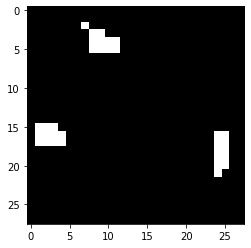

In [ ]:
plt.imshow(np.reshape(X_value_test[0], (28, 28)), cmap="gray")

In [ ]:
print("Calcul de la précision du model")
print("Moyenne")
print(count/len(X_labels_train))

Calcul de la précision du model
Moyenne
0.994375


## Question 2 
Imaginez qu’on vous donne un fichier contenant des données de nature astronomique. Il s’agit de données concernant 6500 milliards d’étoiles. Les données (dépassant la centaine de téraoctets) sont réparties sur 300 serveurs avec un accès rapide au disque et une bonne capacité de calcul. La connexion entre les serveurs est rapide, mais pas exceptionnelle.

Les données pour chaque étoile comporte, la position dans l’espace (x,y,z), la luminosité apparente de l’étoile et sa catégorie (10 catégories possibles). Aussi, pour chaque étoile une liste de ses caractéristiques physiques représentées par 22 nombres réels est incluse.

Proposez une approche distribuée qui permet de répondre aux questions suivantes et expliquez en détail toute la démarche permettant leur résolution.
Trouvez les 1000 paires d’étoiles les plus proches (distance euclidienne de la position).
Comptez combien d'étoiles il y a dans chaque catégorie.
Produisez un classifieur qui, étant donné le vecteur de caractéristiques (22 nombres réels), prédit la catégorie de l’étoile.


## Question 3

Expliquez en détail comment utiliser un classifieur binaire, capable d’apprendre à effectuer la classification de deux catégories, pour réaliser la classification dans un contexte ou plusieurs catégories doivent être distinguées. Considérez le cas à 3, 25, 12500 catégories et faite le contraste entre les différentes approches étudiées et le nombre de catégories.


Si nous nous retrouvons avec 3, 25, 12500, nous avons un problème de classification multi-classe donc non binaire.

Mais nous pouvons réduire ce problème en problème de classfication binaire en utilisant la technique *One vs. All* . On transforme **N-classes** en **N modèles de classifcations binaires**

Dans la classification one-vs-All, pour l'ensemble de données des instances de classe N, nous devons générer les modèles de classificateurs N-binaires. Le nombre d'étiquettes de classe présentes dans l'ensemble de données et le nombre de classificateurs binaires générés doivent être identiques.

Dans le cas de **3 catégories**, on a l'illustration ci-dessous:

Text(0.5, 1.0, 'Exemple de One-vs-all')

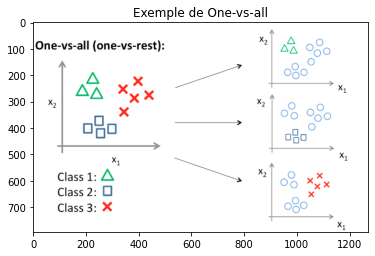

In [ ]:
plt.imshow(mpimg.imread("svm.png"))
plt.title("Exemple de One-vs-all")

Comme le montre l'image ci-dessus, considérons que nous avons trois classes, par exemple, le type 1 pour le vert, le type 2 pour le bleu et le type 3 pour le rouge.

Maintenant, comme on vous l'a dit plus tôt, nous devons générer le même nombre de classificateurs que les étiquettes de classe sont présentes dans l'ensemble de données, nous devons donc créer ici trois classificateurs binaires pour trois classes respectives.



*   Classificateur 1:- [Vert] vs [Rouge, Bleu]
* Classificateur 2 : [Bleu] vs [Vert, Rouge]
* Classificateur 3 : [Rouge] vs [Bleu, Vert]



Nous pourrons maintenant implémenter un algorithme pour la classification binaire (e.g.: Support de vecteurs machine) pour chaque Classificateur *i, i = 1,2,3*.

Cette approche exige que chaque modèle prévoie une probabilité d'appartenance à une classe ou un score de type probabiliste. L'argmax de ces scores (indice de classe avec le score le plus élevé) est ensuite utilisé pour prédire une classe.

## Question 4
Faites une analyse des patrons existants dans le jeu de données adulte. Il est possible que le regroupement de valeurs pour certaines caractéristiques donne des résultats intéressants. Vous devez aussi discuter de l’aspect éthique concernant l’utilisation des patrons obtenus.
